## Utilize Linear and Non-Linear (polynomial with degree n) regression models to compare trends for a single state (each member should choose different state) and its counties (top 5 with highest number of cases). Start your data from 2020.06.01 (Monday) to 2021.01.03 (Sunday).

## State Chosen: New york

In [92]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import plotly.express as px
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy import stats
from IPython.display import Image
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

### Get the Cases and Death for New York only

In [93]:
cases = pd.read_csv('../../Team/covid_confirmed_usafacts.csv')

ny_cases = cases[cases["State"] == "NY"]
selected_date_columns = [col for col in ny_cases.columns if '2020-06-01' <= col <= '2021-01-03']
ny_cases = ny_cases[selected_date_columns]
ny_cases.head()

,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,...,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31,2021-01-01,2021-01-02,2021-01-03
1860,69,69,69,69,69,69,69,69,69,69,...,69,69,69,69,69,69,69,69,69,69
1861,1882,1900,1920,1930,1941,1953,1961,1978,1983,1986,...,10274,10489,10629,10880,11112,11333,11585,11917,12199,12405
1862,48,48,49,49,51,51,51,51,51,52,...,1693,1719,1731,1748,1762,1782,1831,1876,1894,1927
1863,45359,45466,45571,45688,45778,45882,45980,46052,46127,46223,...,78663,79308,79759,80350,81104,81882,82992,83975,85069,85646
1864,574,578,589,593,605,613,620,624,627,630,...,7540,7616,7663,7745,7855,8004,8157,8301,8487,8601


In [94]:
#convert the cases to a series
daily_cases = []
for col in ny_cases.columns:
    daily_cases.append(ny_cases[col].sum())
daily_cases_data = pd.Series(daily_cases)

In [95]:
deaths = pd.read_csv('../../Team/covid_deaths_usafacts.csv')
ny_deaths = deaths[deaths["State"] == "NY"]
selected_date_columns = [col for col in ny_deaths.columns if '2020-06-01' <= col <= '2021-01-03']
ny_deaths = ny_deaths[selected_date_columns]
ny_deaths.head()

,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,...,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31,2021-01-01,2021-01-02,2021-01-03
1860,282,303,290,274,248,230,211,216,222,207,...,207,207,207,246,252,252,255,265,258,251
1861,100,100,100,100,100,101,101,101,101,102,...,194,194,194,196,200,200,202,205,208,212
1862,2,2,2,2,2,2,2,2,2,2,...,71,71,71,72,72,72,72,73,73,73
1863,4480,4482,4494,4510,4520,4526,4532,4541,4549,4564,...,5074,5074,5074,5124,5134,5134,5137,5137,5137,5147
1864,50,50,50,51,52,52,53,54,54,54,...,195,195,195,200,202,202,202,206,208,210


In [96]:
#convert the deaths to a series
daily_deaths = []
for col in ny_deaths.columns:
    daily_deaths.append(ny_deaths[col].sum())
daily_deaths_data = pd.Series(daily_deaths)

## Utilize Linear and Non-Linear (polynomial with degree n) regression models 

### degree = 1

In [97]:
days = np.arange(len(daily_cases_data))

# Linear Regression
coeff_cases_linear = np.polyfit(days, daily_cases_data, 1)
cases_linear_predictions = np.polyval(coeff_cases_linear, days)

coeff_deaths_linear = np.polyfit(days, daily_deaths_data, 1)
deaths_linear_predictions = np.polyval(coeff_deaths_linear, days)

# Polynomial Regression
degree = 1
coeff_cases_poly = np.polyfit(days, daily_cases_data, degree)
cases_poly_predictions = np.polyval(coeff_cases_poly, days)

coeff_deaths_poly = np.polyfit(days, daily_deaths_data, degree)
deaths_poly_predictions = np.polyval(coeff_deaths_poly, days)

# Create DataFrame
df = pd.DataFrame({
    'Days': days,
    'Actual Cases': daily_cases_data,
    'Cases Linear Predictions': cases_linear_predictions,
    f'Cases Polynomial (Degree {degree}) Predictions': cases_poly_predictions,
    'Actual Deaths': daily_deaths_data,
    'Deaths Linear Predictions': deaths_linear_predictions,
    f'Deaths Polynomial (Degree {degree}) Predictions': deaths_poly_predictions
})

# Plotting using Plotly Express
fig_cases = px.line(df, x='Days', y=['Actual Cases', 'Cases Linear Predictions',
                                    f'Cases Polynomial (Degree {degree}) Predictions'],
                    labels={'value': 'Number of Cases'}, title='Cases Linear vs. Polynomial Regression')

fig_deaths = px.line(df, x='Days', y=['Actual Deaths', 'Deaths Linear Predictions',
                                      f'Deaths Polynomial (Degree {degree}) Predictions'],
                     labels={'value': 'Number of Deaths'}, title='Deaths Linear vs. Polynomial Regression')

# Update layout
fig_cases.update_layout(width=1000, height=500)
fig_deaths.update_layout(width=1000, height=500)

# Save figures
fig_cases.write_image("fig_cases1.png")
fig_deaths.write_image("fig_deaths1.png")

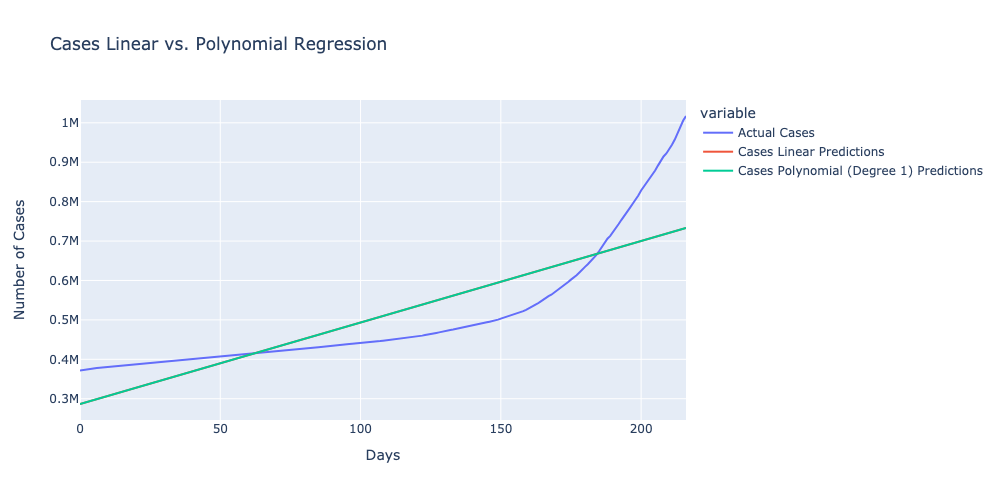

In [98]:
Image(filename="fig_cases1.png")

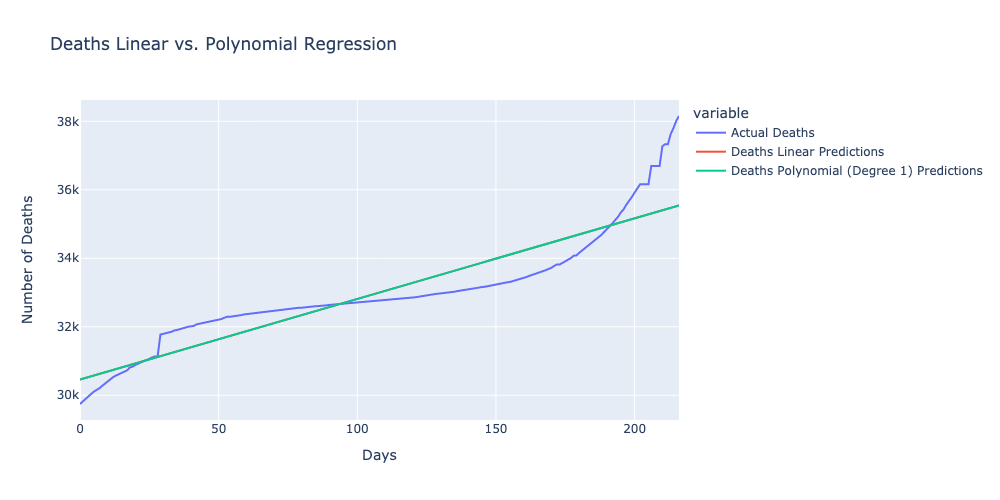

In [99]:
Image(filename="fig_deaths1.png")

### degree = 2

In [100]:
days = np.arange(len(daily_cases_data))

# Linear Regression
coeff_cases_linear = np.polyfit(days, daily_cases_data, 1)
cases_linear_predictions = np.polyval(coeff_cases_linear, days)

coeff_deaths_linear = np.polyfit(days, daily_deaths_data, 1)
deaths_linear_predictions = np.polyval(coeff_deaths_linear, days)

# Polynomial Regression
degree = 2
coeff_cases_poly = np.polyfit(days, daily_cases_data, degree)
cases_poly_predictions = np.polyval(coeff_cases_poly, days)

coeff_deaths_poly = np.polyfit(days, daily_deaths_data, degree)
deaths_poly_predictions = np.polyval(coeff_deaths_poly, days)

# Create DataFrame
df = pd.DataFrame({
    'Days': days,
    'Actual Cases': daily_cases_data,
    'Cases Linear Predictions': cases_linear_predictions,
    f'Cases Polynomial (Degree {degree}) Predictions': cases_poly_predictions,
    'Actual Deaths': daily_deaths_data,
    'Deaths Linear Predictions': deaths_linear_predictions,
    f'Deaths Polynomial (Degree {degree}) Predictions': deaths_poly_predictions
})

# Plotting using Plotly Express
fig_cases = px.line(df, x='Days', y=['Actual Cases', 'Cases Linear Predictions',
                                    f'Cases Polynomial (Degree {degree}) Predictions'],
                    labels={'value': 'Number of Cases'}, title='Cases Linear vs. Polynomial Regression')

fig_deaths = px.line(df, x='Days', y=['Actual Deaths', 'Deaths Linear Predictions',
                                      f'Deaths Polynomial (Degree {degree}) Predictions'],
                     labels={'value': 'Number of Deaths'}, title='Deaths Linear vs. Polynomial Regression')

# Update layout
fig_cases.update_layout(width=1000, height=500)
fig_deaths.update_layout(width=1000, height=500)

# Save figures
fig_cases.write_image("fig_cases2.png")
fig_deaths.write_image("fig_deaths2.png")

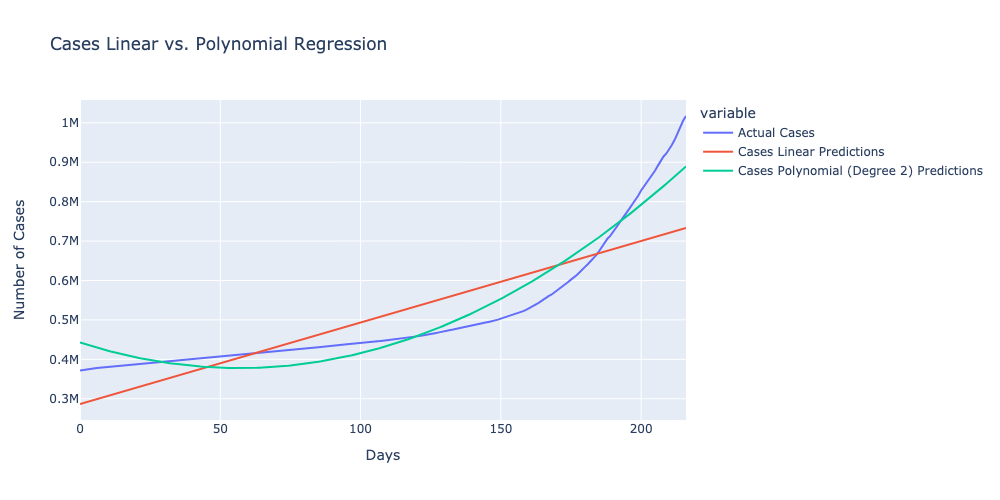

In [101]:
Image(filename="fig_cases2.png")

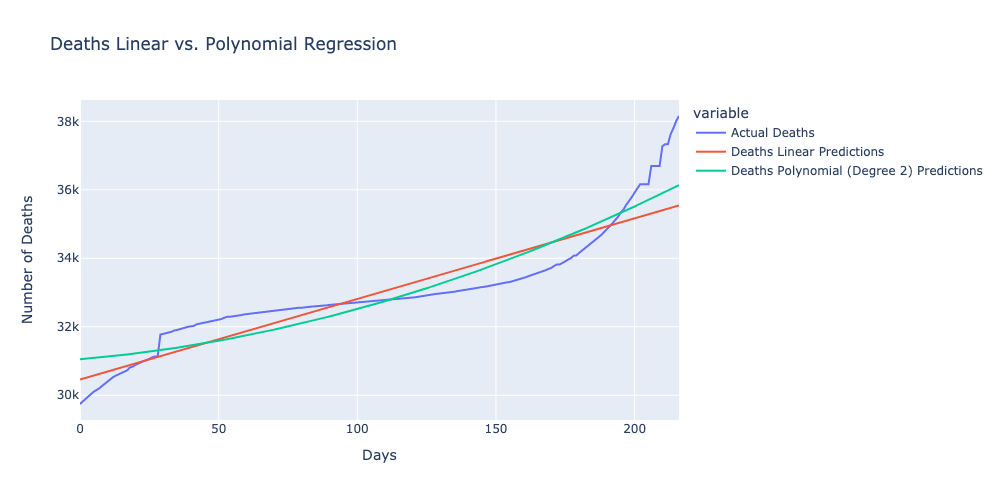

In [102]:
Image(filename="fig_deaths2.png")

### degree = 3

In [103]:
days = np.arange(len(daily_cases_data))

# Linear Regression
coeff_cases_linear = np.polyfit(days, daily_cases_data, 1)
cases_linear_predictions = np.polyval(coeff_cases_linear, days)

coeff_deaths_linear = np.polyfit(days, daily_deaths_data, 1)
deaths_linear_predictions = np.polyval(coeff_deaths_linear, days)

# Polynomial Regression
degree = 3
coeff_cases_poly = np.polyfit(days, daily_cases_data, degree)
cases_poly_predictions = np.polyval(coeff_cases_poly, days)

coeff_deaths_poly = np.polyfit(days, daily_deaths_data, degree)
deaths_poly_predictions = np.polyval(coeff_deaths_poly, days)

# Create DataFrame
df = pd.DataFrame({
    'Days': days,
    'Actual Cases': daily_cases_data,
    'Cases Linear Predictions': cases_linear_predictions,
    f'Cases Polynomial (Degree {degree}) Predictions': cases_poly_predictions,
    'Actual Deaths': daily_deaths_data,
    'Deaths Linear Predictions': deaths_linear_predictions,
    f'Deaths Polynomial (Degree {degree}) Predictions': deaths_poly_predictions
})

# Plotting using Plotly Express
fig_cases = px.line(df, x='Days', y=['Actual Cases', 'Cases Linear Predictions',
                                    f'Cases Polynomial (Degree {degree}) Predictions'],
                    labels={'value': 'Number of Cases'}, title='Cases Linear vs. Polynomial Regression')

fig_deaths = px.line(df, x='Days', y=['Actual Deaths', 'Deaths Linear Predictions',
                                      f'Deaths Polynomial (Degree {degree}) Predictions'],
                     labels={'value': 'Number of Deaths'}, title='Deaths Linear vs. Polynomial Regression')

# Update layout
fig_cases.update_layout(width=1000, height=500)
fig_deaths.update_layout(width=1000, height=500)

# Save figures
fig_cases.write_image("fig_cases3.png")
fig_deaths.write_image("fig_deaths3.png")

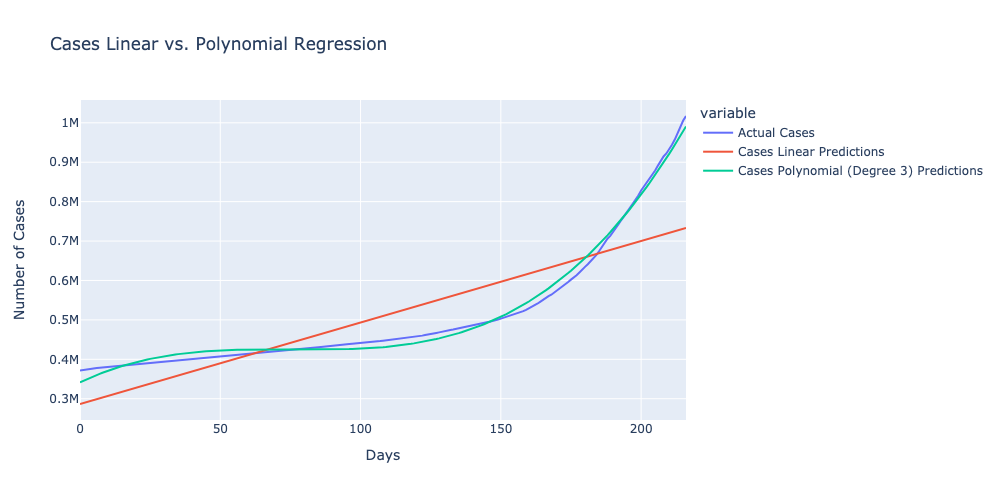

In [104]:
Image(filename="fig_cases3.png")

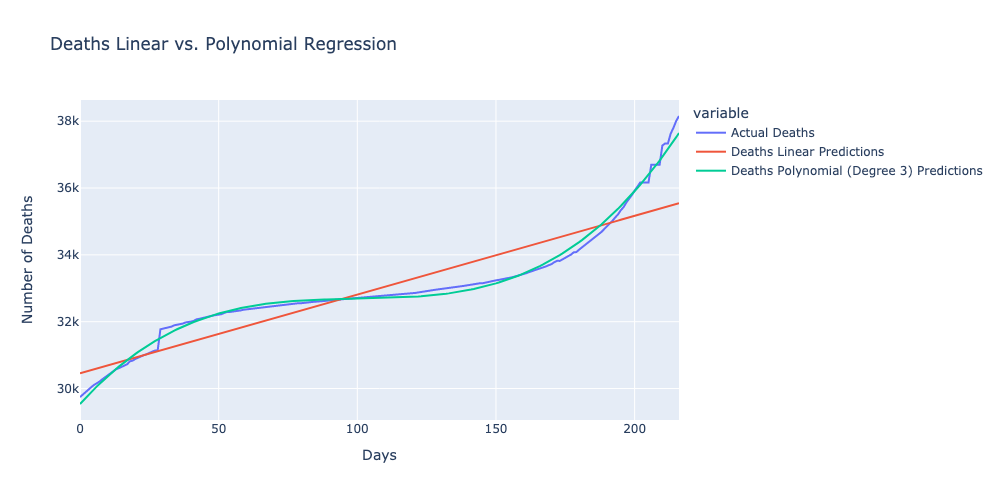

In [105]:
Image(filename="fig_deaths3.png")

In [132]:
# Convert the list to a NumPy array
daily_cases_data = np.array(daily_cases)

# Calculate mean and standard deviation
mean_daily_cases = np.mean(daily_cases_data)
std_daily_cases = np.std(daily_cases_data)

# Set confidence level (95% confidence interval)
confidence_level = 0.95

# Calculate margin of error
margin_of_error = stats.norm.ppf((1 + confidence_level) / 2) * (std_daily_cases / len(daily_cases_data) ** 0.5)

# Calculate confidence interval
confidence_interval = (mean_daily_cases - margin_of_error, mean_daily_cases + margin_of_error)

# Display the results
print(f"Mean Daily Cases: {mean_daily_cases}")
print(f"Standard Deviation: {std_daily_cases}")
print(f"Confidence Interval ({int(confidence_level * 100)}%): {confidence_interval}")



Mean Daily Cases: 509988.83410138247
Standard Deviation: 153409.94335022426
Confidence Interval (95%): (489577.48391822074, 530400.1842845442)


In [135]:
# Convert the list to a NumPy array
daily_deaths_data = np.array(daily_deaths)

# Calculate mean and standard deviation
mean_daily_deaths = np.mean(daily_deaths_data)
std_daily_deaths = np.std(daily_deaths_data)

# Set confidence level (e.g., 95% confidence interval)
confidence_level = 0.95

# Calculate margin of error
margin_of_error = stats.norm.ppf((1 + confidence_level) / 2) * (std_daily_deaths / len(daily_deaths_data) ** 0.5)

# Calculate confidence interval
confidence_interval = (mean_daily_deaths - margin_of_error, mean_daily_deaths + margin_of_error)

# Display the results
print(f"Mean Daily deaths: {mean_daily_deaths}")
print(f"Standard Deviation: {std_daily_deaths}")
print(f"Confidence Interval ({int(confidence_level * 100)}%): {confidence_interval}")


Mean Daily deaths: 33000.48387096774
Standard Deviation: 1615.8224827693182
Confidence Interval (95%): (32785.49703367821, 33215.47070825727)


## Calcluate error using RMSE.(10 points)

In [106]:
# Linear Regression
coeff_cases_linear = np.polyfit(days, daily_cases_data, 1)
cases_linear_predictions = np.polyval(coeff_cases_linear, days)

coeff_deaths_linear = np.polyfit(days, daily_deaths_data, 1)
deaths_linear_predictions = np.polyval(coeff_deaths_linear, days)

# Calculate RMSE
rmse_cases_linear = np.sqrt(mean_squared_error(daily_cases_data, cases_linear_predictions))
rmse_deaths_linear = np.sqrt(mean_squared_error(daily_deaths_data, deaths_linear_predictions))

print(f"RMSE for Cases (Linear Regression): {rmse_cases_linear}")
print(f"RMSE for Deaths (Linear Regression): {rmse_deaths_linear}")

RMSE for Cases (Linear Regression): 82191.13259066748
RMSE for Deaths (Linear Regression): 660.0751941250235


In [107]:
# Polynomial Regression
degree = 1
coeff_cases_poly = np.polyfit(days, daily_cases_data, degree)
cases_poly_predictions = np.polyval(coeff_cases_poly, days)

coeff_deaths_poly = np.polyfit(days, daily_deaths_data, degree)
deaths_poly_predictions = np.polyval(coeff_deaths_poly, days)

# Calculate RMSE
rmse_cases_poly = np.sqrt(mean_squared_error(daily_cases_data, cases_poly_predictions))
rmse_deaths_poly = np.sqrt(mean_squared_error(daily_deaths_data, deaths_poly_predictions))

print(f"RMSE for Cases (Polynomial Regression - Degree {degree}): {rmse_cases_poly}")
print(f"RMSE for Deaths (Polynomial Regression - Degree {degree}): {rmse_deaths_poly}")

RMSE for Cases (Polynomial Regression - Degree 1): 82191.13259066748
RMSE for Deaths (Polynomial Regression - Degree 1): 660.0751941250235


In [108]:
# Polynomial Regression
degree = 2
coeff_cases_poly = np.polyfit(days, daily_cases_data, degree)
cases_poly_predictions = np.polyval(coeff_cases_poly, days)

coeff_deaths_poly = np.polyfit(days, daily_deaths_data, degree)
deaths_poly_predictions = np.polyval(coeff_deaths_poly, days)

# Calculate RMSE
rmse_cases_poly = np.sqrt(mean_squared_error(daily_cases_data, cases_poly_predictions))
rmse_deaths_poly = np.sqrt(mean_squared_error(daily_deaths_data, deaths_poly_predictions))

print(f"RMSE for Cases (Polynomial Regression - Degree {degree}): {rmse_cases_poly}")
print(f"RMSE for Deaths (Polynomial Regression - Degree {degree}): {rmse_deaths_poly}")

RMSE for Cases (Polynomial Regression - Degree 2): 41774.05059619842
RMSE for Deaths (Polynomial Regression - Degree 2): 603.2670286131615


In [109]:
# Polynomial Regression
degree = 3
coeff_cases_poly = np.polyfit(days, daily_cases_data, degree)
cases_poly_predictions = np.polyval(coeff_cases_poly, days)

coeff_deaths_poly = np.polyfit(days, daily_deaths_data, degree)
deaths_poly_predictions = np.polyval(coeff_deaths_poly, days)

# Calculate RMSE
rmse_cases_poly = np.sqrt(mean_squared_error(daily_cases_data, cases_poly_predictions))
rmse_deaths_poly = np.sqrt(mean_squared_error(daily_deaths_data, deaths_poly_predictions))

print(f"RMSE for Cases (Polynomial Regression - Degree {degree}): {rmse_cases_poly}")
print(f"RMSE for Deaths (Polynomial Regression - Degree {degree}): {rmse_deaths_poly}")

RMSE for Cases (Polynomial Regression - Degree 3): 13894.685378246904
RMSE for Deaths (Polynomial Regression - Degree 3): 139.46261639157632


### Perform linear regression analysis 

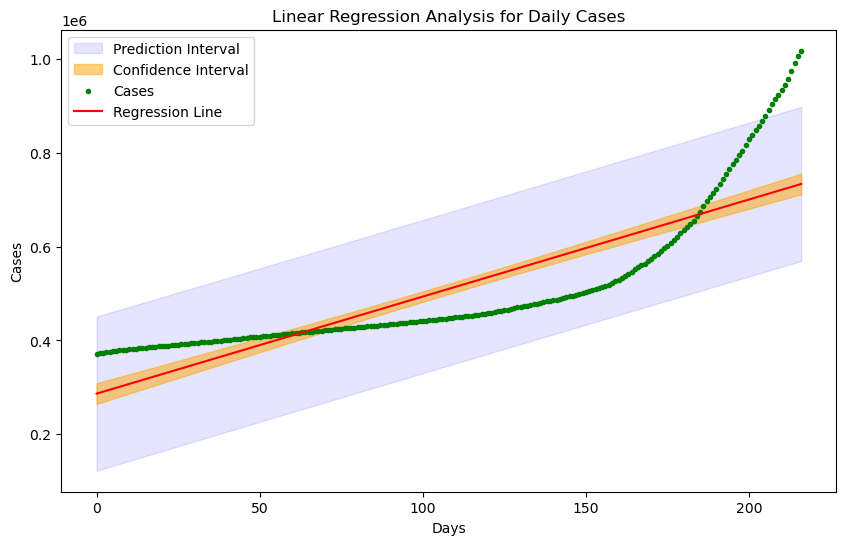

In [110]:
# Create day range
days_cases = range(len(daily_cases_data))

# Fit OLS regression model
model_cases = smf.ols('daily_cases_data ~ days_cases', data=df)
results_cases = model_cases.fit()

# Set confidence level
alpha = 0.05

# Generate predictions and intervals
predictions_cases = results_cases.get_prediction(df).summary_frame(alpha=alpha)

# Plotting
plt.figure(figsize=(10, 6))

# Prediction interval
plt.fill_between(days_cases, predictions_cases['obs_ci_lower'], predictions_cases['obs_ci_upper'], alpha=.1, label='Prediction Interval', color='blue')

# Confidence interval
plt.fill_between(days_cases, predictions_cases['mean_ci_lower'], predictions_cases['mean_ci_upper'], alpha=.5, label='Confidence Interval', color='orange')

# Scatter plot of actual cases
plt.scatter(days_cases, daily_cases_data, label='Cases', marker='.', color='green')

# Regression line
plt.plot(days_cases, predictions_cases['mean'], label='Regression Line', color='red')

# Set labels and legend
plt.xlabel('Days')
plt.ylabel('Cases')
plt.title('Linear Regression Analysis for Daily Cases')
plt.legend()

# Show the plot
plt.show()

### Now we do it for deaths

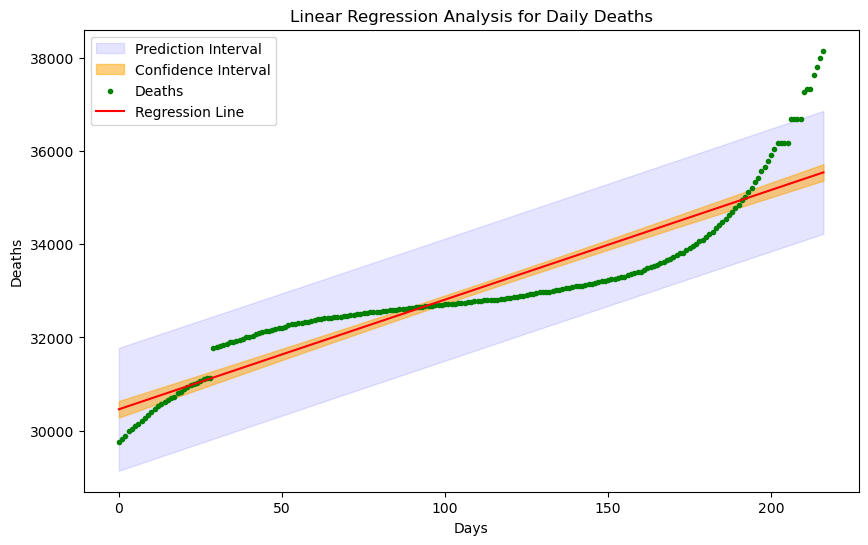

In [111]:
# Create day range
days_deaths = range(len(daily_deaths_data))

# Fit OLS regression model
model_deaths = smf.ols('daily_deaths_data ~ days_deaths', data=df)
results_deaths = model_deaths.fit()

# Set confidence level
alpha = 0.05

# Generate predictions and intervals
predictions_deaths = results_deaths.get_prediction(df).summary_frame(alpha=alpha)

# Plotting
plt.figure(figsize=(10, 6))

# Prediction interval
plt.fill_between(days_deaths, predictions_deaths['obs_ci_lower'], predictions_deaths['obs_ci_upper'], alpha=.1, label='Prediction Interval', color='blue')

# Confidence interval
plt.fill_between(days_deaths, predictions_deaths['mean_ci_lower'], predictions_deaths['mean_ci_upper'], alpha=.5, label='Confidence Interval', color='orange')

# Scatter plot of actual deaths
plt.scatter(days_deaths, daily_deaths_data, label='Deaths', marker='.', color='green')

# Regression line
plt.plot(days_deaths, predictions_deaths['mean'], label='Regression Line', color='red')

# Set labels and legend
plt.xlabel('Days')
plt.ylabel('Deaths')
plt.title('Linear Regression Analysis for Daily Deaths')
plt.legend()

# Show the plot
plt.show()

## Identify which counties are most at risk. Model for top 5 counties with cases within a state and describe their trends. (10 points)

In [112]:
# Read the CSV file
cases = pd.read_csv('../../Team/covid_confirmed_usafacts.csv')

# Select relevant date columns
selected_date_columns = [col for col in cases.columns if '2020-06-01' <= col <= '2021-01-03']

# Define additional columns
additional_columns = ["County Name", "State"]

# Combine selected and additional columns
selected_columns = additional_columns + selected_date_columns

# Filter for North Carolina (NC)
ny_cases = cases[cases["State"] == "NY"][selected_columns]

# Calculate total cases for each county
total_cases_per_county = ny_cases.set_index("County Name")[selected_date_columns].sum(axis=1)

# Get the top 5 counties with the highest total cases
top_5_counties_cases = total_cases_per_county.nlargest(5).index.tolist()

# Print the result
print("Top 5 counties with high cases:")
print(top_5_counties_cases)

# Display the DataFrame
ny_cases.set_index('County Name', inplace=True)
ny_cases.drop(columns='State', inplace=True)
ny_cases.head()

Top 5 counties with high cases:
['Queens County ', 'Kings County ', 'Bronx County ', 'Suffolk County ', 'Nassau County ']


,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,...,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31,2021-01-01,2021-01-02,2021-01-03
County Name,,,,,,,,,,,,,,,,,,,,,
Statewide Unallocated,69,69,69,69,69,69,69,69,69,69,...,69,69,69,69,69,69,69,69,69,69
Albany County,1882,1900,1920,1930,1941,1953,1961,1978,1983,1986,...,10274,10489,10629,10880,11112,11333,11585,11917,12199,12405
Allegany County,48,48,49,49,51,51,51,51,51,52,...,1693,1719,1731,1748,1762,1782,1831,1876,1894,1927
Bronx County,45359,45466,45571,45688,45778,45882,45980,46052,46127,46223,...,78663,79308,79759,80350,81104,81882,82992,83975,85069,85646
Broome County,574,578,589,593,605,613,620,624,627,630,...,7540,7616,7663,7745,7855,8004,8157,8301,8487,8601


In [113]:
def extract_daily_cases_data(county_data):
    daily_cases_trend = [county_data[col].values for col in county_data.columns]
    return [item for sublist in daily_cases_trend for item in sublist]

def perform_linear_regression(days, daily_cases_data):
    lr = LinearRegression()
    lr.fit(days.reshape(-1, 1), daily_cases_data)
    return lr.predict(days.reshape(-1, 1))

def perform_polynomial_regression(days, daily_cases_data, degree):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(days.reshape(-1, 1))
    
    pr = LinearRegression()
    pr.fit(X_poly, daily_cases_data)
    return pr.predict(X_poly)

def plot_daily_cases_trend(county_name, days, daily_cases_data, linear_predictions, poly_predictions, degree):
    df = pd.DataFrame({'Days': days,
                       'New Cases': daily_cases_data,
                       'Linear Predictions': linear_predictions,
                       f'Polynomial (Degree {degree}) Predictions': poly_predictions})

    fig = px.line(df, x='Days', y=['New Cases', 'Linear Predictions',
                                    f'Polynomial (Degree {degree}) Predictions'],
                  labels={'y': 'Number of New Cases', 'x': 'Days'},
                  title=f'Daily Cases Trend for {county_name}')
    fig.update_layout(width=1000, height=500)
    
    image_filename = f'daily_cases_trends_{county_name}.png'
    fig.write_image(image_filename)
    
    return image_filename

# Iterate over top 5 counties
for county in top_5_counties_cases:
    county_data = ny_cases.loc[ny_cases.index == county]
    daily_cases_data = extract_daily_cases_data(county_data)
    days = np.arange(len(daily_cases_data))

    linear_predictions = perform_linear_regression(days, daily_cases_data)
    poly_predictions = perform_polynomial_regression(days, daily_cases_data, degree)

    image_filename = plot_daily_cases_trend(county, days, daily_cases_data, linear_predictions, poly_predictions, degree)


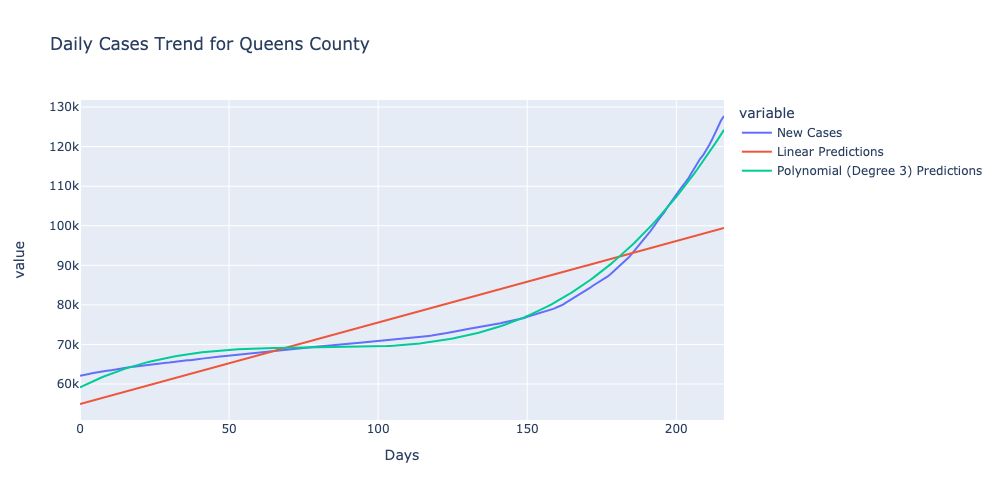

In [114]:
Image(filename="daily_cases_trends_Queens County .png")

#### Observation for Queens County: Starting June 2020 the cases were only about 62,000, but over time the COVID-19 cases increased day by day. By January 2021, there were almost 128,000 COVID-19 cases in Queens County.

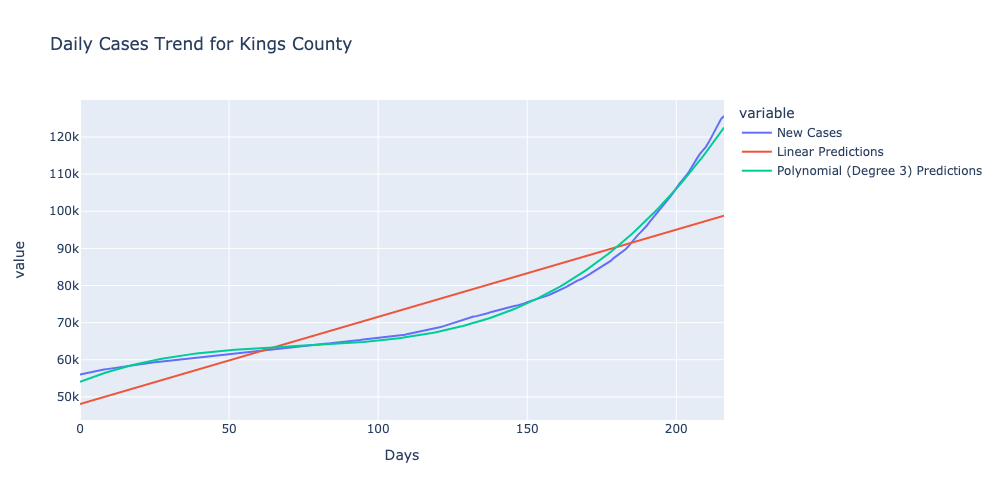

In [115]:
Image(filename="daily_cases_trends_kings County .png")

#### Observation for Kings County: Starting June 2020 the cases were only about 55,000, but over time cases increased. By January 2021, there were almost 125,000 cases 

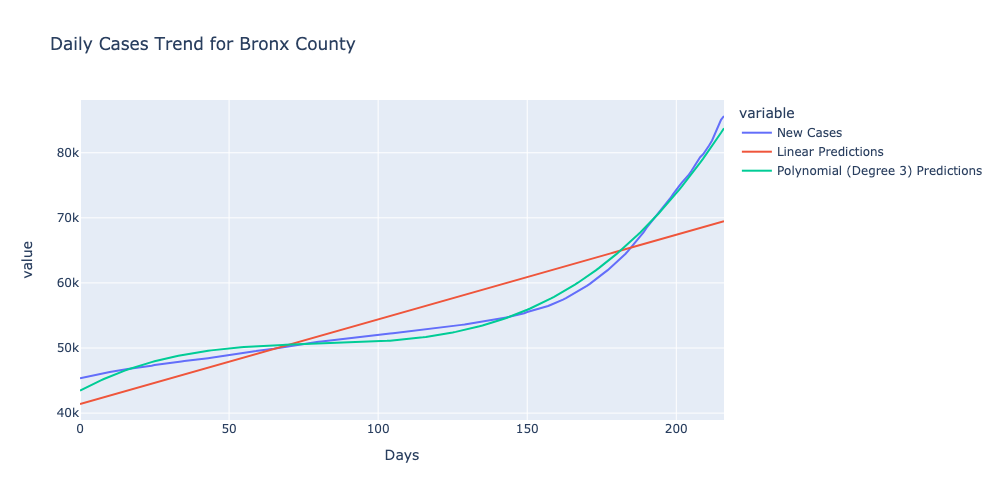

In [116]:
Image(filename="daily_cases_trends_Bronx County .png")

#### Observation for Bronx County: Starting June 2020 the cases were really low only about  45,000 By January 2021, there were almost 87,000 COVID-19 cases in Bronx County.

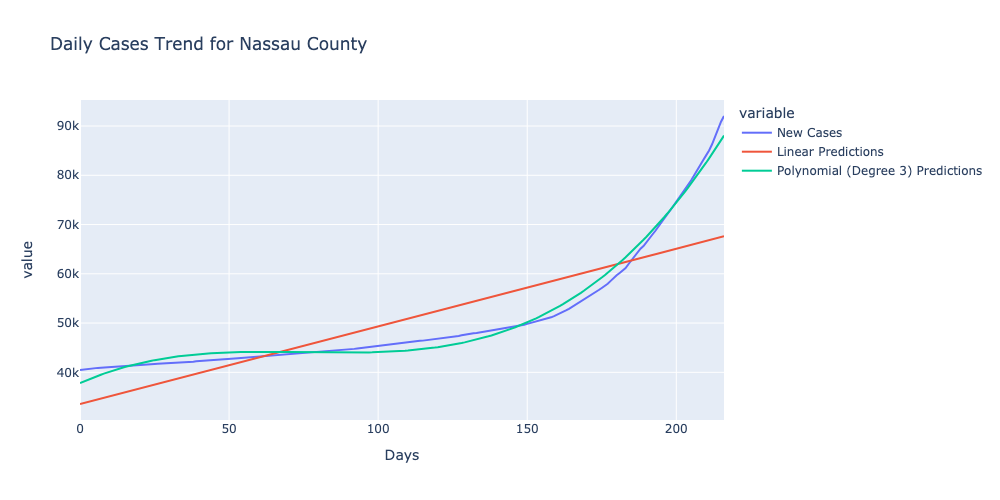

In [117]:
Image(filename="daily_cases_trends_Nassau County .png")

#### Observation for Nassau County: In June 2020 the cases were only about 40,000, but over time cases increased. By January 2021, there were almost 92,000 cases 

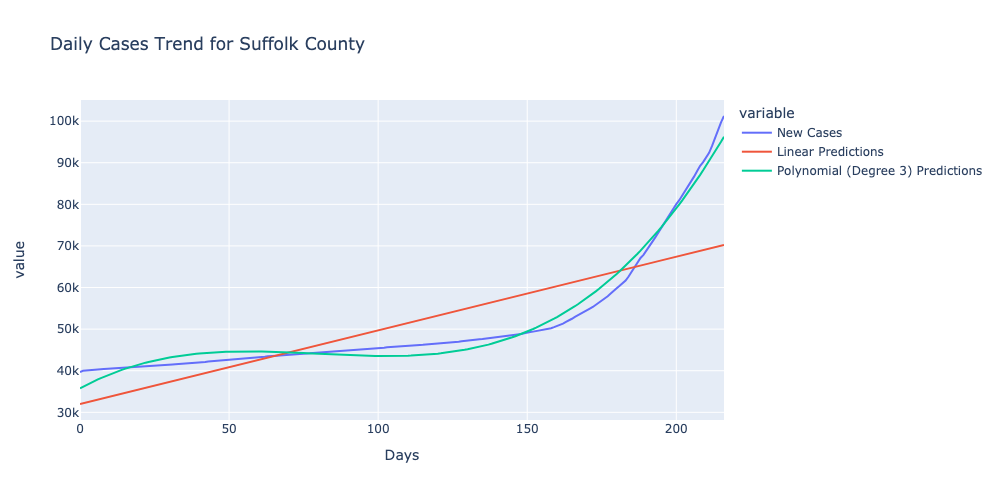

In [118]:
Image(filename="daily_cases_trends_Suffolk County .png")

#### Observation for Bronx County: Starting June 2020 the cases were really low only about  40,000 By January 2021, there were almost 101,000 COVID-19 cases in Bronx County.

## Perform hypothesis tests on questions identified in Stage III. (20 points)

In [119]:
# import all the employment data 
employment_jan_feb_mar = pd.read_excel('allhlcn201.xlsx')
employment_apr_may_jun = pd.read_excel('allhlcn202.xlsx')
employment_jul_aug_sep = pd.read_excel('allhlcn203.xlsx')
employment_oct_nov_dec = pd.read_excel('allhlcn204.xlsx')

# filter the data to only get the New york data and in the corresponding months
ny_employment_jan_feb_mar = employment_jan_feb_mar[employment_jan_feb_mar["St Name"] == "New York"]
ny_employment_jan_feb_mar = ny_employment_jan_feb_mar[["January Employment", "February Employment", "March Employment"]]

ny_employment_apr_may_jun = employment_apr_may_jun[employment_apr_may_jun["St Name"] == "New York"]
ny_employment_apr_may_jun = ny_employment_apr_may_jun[["April Employment", "May Employment", "June Employment"]]

ny_employment_jul_aug_sep = employment_jul_aug_sep[employment_jul_aug_sep["St Name"] == "New York"]
ny_employment_jul_aug_sep = ny_employment_jul_aug_sep[["July Employment", "August Employment", "September Employment"]]

ny_employment_oct_nov_dec = employment_oct_nov_dec[employment_oct_nov_dec["St Name"] == "New York"]
ny_employment_oct_nov_dec = ny_employment_oct_nov_dec[["October Employment", "November Employment", "December Employment"]]


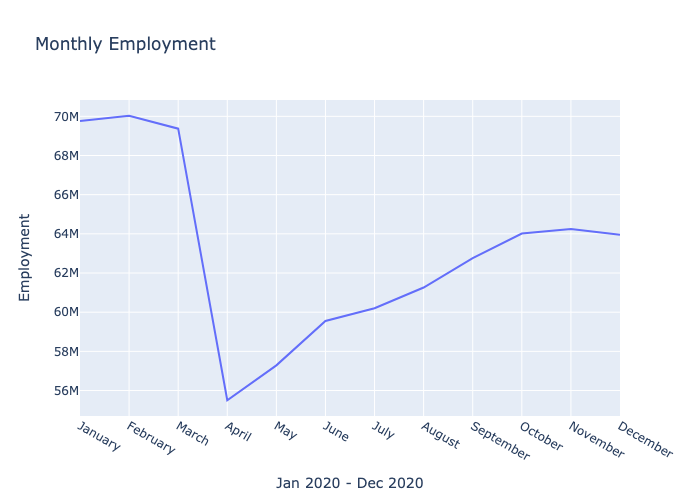

In [120]:
# adding the sum of the each month to plot
ny_employment_jan = ny_employment_jan_feb_mar["January Employment"].sum()
ny_employment_feb = ny_employment_jan_feb_mar["February Employment"].sum()
ny_employment_mar = ny_employment_jan_feb_mar["March Employment"].sum()

ny_employment_apr = ny_employment_apr_may_jun["April Employment"].sum()
ny_employment_may = ny_employment_apr_may_jun["May Employment"].sum()
ny_employment_jun = ny_employment_apr_may_jun["June Employment"].sum()

ny_employment_jul = ny_employment_jul_aug_sep["July Employment"].sum()
ny_employment_aug = ny_employment_jul_aug_sep["August Employment"].sum()
ny_employment_sep = ny_employment_jul_aug_sep["September Employment"].sum()

ny_employment_oct = ny_employment_oct_nov_dec["October Employment"].sum()
ny_employment_nov = ny_employment_oct_nov_dec["November Employment"].sum()
ny_employment_dec = ny_employment_oct_nov_dec["December Employment"].sum()

months = ["January", "February", "March", "April","May","June","July", "August", "September", "October", "November", "December"]
employment_sums = [ny_employment_jan, ny_employment_feb, ny_employment_mar, ny_employment_apr, ny_employment_may, ny_employment_jun, ny_employment_jul, ny_employment_aug, ny_employment_sep, ny_employment_oct, ny_employment_nov, ny_employment_dec]
employment_sum = [ny_employment_jun, ny_employment_jul, ny_employment_aug, ny_employment_sep, ny_employment_oct, ny_employment_nov, ny_employment_dec]

data = {
    'Jan 2020 - Dec 2020': months,
    'Employment': employment_sums
}
# plot
fig = px.line(data, x='Jan 2020 - Dec 2020', y='Employment', title='Monthly Employment')
fig.write_image("employ.png")
Image(filename="employ.png")

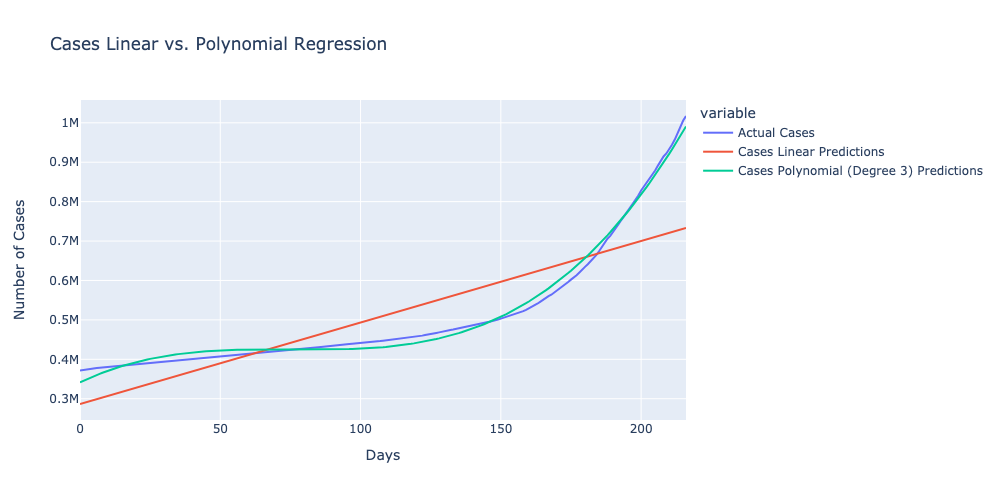

In [130]:
Image(filename="fig_cases3.png")

## you can also make 3 new hypotheses and do hypothesis tests on them.

### Hypothesis 1
#### Null Hypothesis: There is no correlation between employment levels in New York and the daily number of COVID-19 cases.
#### Alternative Hypothesis: There is a significant correlation between employment levels in New York and the daily number of COVID-19 cases.

In [121]:
# Check and trim arrays to the minimum length
min_length = min(len(ny_employment_data), len(daily_cases_data_trimmed))
ny_employment_data = ny_employment_data[:min_length]
daily_cases_data_trimmed = daily_cases_data_trimmed[:min_length]

# Create DataFrame
df = pd.DataFrame({'Employment': ny_employment_data.values, 'DailyCases': daily_cases_data_trimmed.values})
correlation_coefficient_1, p_value_1 = pearsonr(df['Employment'], df['DailyCases'])

if p_value_1 < alpha:
    print("Reject the null hypothesis. There is a significant correlation between employment and daily COVID cases.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation.")


Reject the null hypothesis. There is a significant correlation between employment and daily COVID cases.


### Hypothesis 2
#### Null Hypothesis (H0): There is no significant difference in the mean employment levels between the first half (January to June) and the second half (July to December) of the year in New York.
#### Alternative Hypothesis (H1):There is a significant difference in the mean employment levels between the first half (January to June) and the second half (July to December) of the year in New York.

In [124]:
from scipy.stats import ttest_rel

# Concatenate employment data for the first and second halves of the year
ny_employment_first_half = pd.concat([ny_employment_jan_feb_mar, ny_employment_apr_may_jun], axis=1)
ny_employment_second_half = pd.concat([ny_employment_jul_aug_sep, ny_employment_oct_nov_dec], axis=1)

# Perform paired sample t-test
t_stat, p_value = ttest_rel(ny_employment_first_half.values.flatten(), ny_employment_second_half.values.flatten())


# Decide whether to reject the null hypothesis
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


Fail to reject the null hypothesis


### Hypothesis 3:
##### Null Hypothesis: There is no significant difference in average employment between months with high COVID-19 cases and months with low COVID-19 cases.

##### Alternative Hypothesis: There is a significant difference in average employment between months with high COVID-19 cases and months with low COVID-19 cases.

##### Hypothesis Test: Two-sample t-test.

In [128]:
from scipy.stats import ttest_ind

# Convert daily_cases_data to a Pandas Series
daily_cases_series = pd.Series(daily_cases_data)

# Categorize months into high and low COVID-19 cases
high_cases_months = daily_cases_series[daily_cases_series > daily_cases_series.mean()]
low_cases_months = daily_cases_series[daily_cases_series <= daily_cases_series.mean()]

# Perform two-sample t-test
t_statistic, p_value = ttest_ind(high_cases_months, low_cases_months)

# Check the p-value to determine significance
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference.")


Reject the null hypothesis. There is a significant difference.


### Hypothesis 4:
##### Null Hypothesis: There is no significant association between employment status (high/low) and COVID-19 cases.

#### Alternative Hypothesis: There is a significant association between employment status (high/low) and COVID-19 cases.

#### Hypothesis Test: Chi-square test.

In [129]:
from scipy.stats import chi2_contingency

# Convert daily_cases_data to a Pandas Series
daily_cases_series = pd.Series(daily_cases_data)

# Create a contingency table
contingency_table = pd.crosstab((daily_cases_series > daily_cases_series.mean()).astype(int), columns="count")

# Perform chi-square test
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

# Check the p-value to determine significance
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference.")


Fail to reject the null hypothesis. There is no significant difference.
